In [33]:
#Read the CSV file using pandas read_csv and convert it into dataframes

import pandas as pd
df_fake_news = pd.read_csv("..\\Fake and Real News\\Fake.csv")
df_true_news = pd.read_csv("..\\Fake and Real News\\True.csv")

In [34]:
# Checking the shape of dataframes
df_fake_news.shape

(23481, 4)

In [35]:
df_true_news.shape

(21417, 4)

In [36]:
# List top 5 rows
df_fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [37]:
# List top 5 rows
df_true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [38]:
# Grouping the data based on the subject and count of element in each subject 
df_fake_news.groupby('subject').count()

,title,text,date
subject,,,
Government News,1570,1570,1570
Middle-east,778,778,778
News,9050,9050,9050
US_News,783,783,783
left-news,4459,4459,4459
politics,6841,6841,6841


In [39]:
# Grouping the data based on the subject and count of element in each subject
df_true_news.groupby('subject').count()

,title,text,date
subject,,,
politicsNews,11272,11272,11272
worldnews,10145,10145,10145


In [40]:
# Checking the Data Type
df_fake_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [41]:
df_true_news.dtypes

title      object
text       object
subject    object
date       object
dtype: object

Since, grouping of both of the dataframes are very much different, we didn't be able to proceed on groups basis. Let's first clean the Data.

# Cleaning the Data

In [84]:
# Check For NA
df_fake_news.isna().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [85]:
df_true_news.isna().any()

title      False
text       False
subject    False
date       False
dtype: bool

In [42]:
# Since date field is in str, covert it in DateTime
# Fake News
dt_issues = df_fake_news[~df_fake_news['date'].str.contains(u'\w+ \d+, \d+')]

In [43]:
dt_pat_1 = dt_issues[dt_issues['date'].str.contains(u'\d+-\w+-\d+')]

In [44]:
# Covert this pat to "\w+ \d+, \d+" pat and replace it in the df_fake_news
dt_pat_1
dt_pat_1['date'] = pd.to_datetime(dt_pat_1['date'], format="%d-%b-%y")

<ipython-input-44-71499e6cac5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_pat_1['date'] = pd.to_datetime(dt_pat_1['date'], format="%d-%b-%y")


In [45]:
df_fake_news.loc[df_fake_news['date'].str.contains(u'\d+-\w+-\d+'), 'date'] = dt_pat_1['date'].apply(lambda x: x.strftime('%B %d, %Y'))

In [46]:
df_fake_news = df_fake_news[df_fake_news['date'].str.contains(u'\w+ \d+, \d+')]

In [47]:
df_fake_news[~df_fake_news['date'].str.contains(u'\w+ \d+, \d+')]

,title,text,subject,date


In [48]:
dt_issues = df_fake_news[df_fake_news['date'].str.contains(u'^\w{1,3} \d+, \d+')]

In [49]:
dt_issues

,title,text,subject,date
1310,People Investigating Ivanka Trump’s Chinese F...,The men investigating the working conditions a...,News,"May 31, 2017"
1311,Racist Jerk Takes His Hate To National Black ...,The Smithsonian s Museum of African-American H...,News,"May 31, 2017"
1312,New Poll Is DEVASTATING News For Trump – It’s...,"A new Politico/Morning Consult poll is out, an...",News,"May 31, 2017"
1313,Spicer Claims Trump’s ‘Covfefe’ Tweet Wasn’t ...,"Wednesday morning, Donald Trump brought the wo...",News,"May 31, 2017"
1314,Tesla CEO Elon Musk Sends A Massive Threat To...,As if Donald Trump didn t piss off world leade...,News,"May 31, 2017"
...,...,...,...,...
23361,BOILER ROOM – EP #55 – Roasting the Wretched H...,Tune in to the Alternate Current Radio Network...,Middle-east,"May 4, 2016"
23362,Cruz & Kasich Quit: Trump Crushes Elite Establ...,21st Century Wire says The field is now clear ...,Middle-east,"May 4, 2016"
23363,False Flag Florida: FBI Agents ‘Posing As Terr...,21st Century Wire says The FBI is walking a ve...,Middle-east,"May 3, 2016"
23364,Shock to The System: New Poll Says Trump CAN B...,21st Century Wire says This is the news that t...,Middle-east,"May 3, 2016"


In [50]:
dt_pat_2 = dt_issues[dt_issues['date'].str.contains(u'%b %d, %Y')]

In [51]:
dt_issues['date'] = pd.to_datetime(dt_issues['date'], format="%b %d, %Y")

<ipython-input-51-f3dbf8ca9711>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_issues['date'] = pd.to_datetime(dt_issues['date'], format="%b %d, %Y")


In [52]:
df_fake_news.loc[df_fake_news['date'].str.contains(u'^\w{1,3} \d+, \d+'), 'date'] = dt_issues['date'].apply(lambda x: x.strftime('%B %d, %Y'))

In [53]:
dt_issues = df_fake_news[~df_fake_news['date'].str.contains(u'\w+ \d+, \d+')]

In [54]:
dt_issues

,title,text,subject,date


In [55]:
df_fake_news['date'] = pd.to_datetime(df_fake_news['date'], format="%B %d, %Y")

In [56]:
df_fake_news['date']

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
           ...    
23476   2016-01-16
23477   2016-01-16
23478   2016-01-15
23479   2016-01-14
23480   2016-01-12
Name: date, Length: 23471, dtype: datetime64[ns]

In [57]:
# True News
dt_issues = df_true_news[~df_true_news['date'].str.contains(u'\w+ \d+, \d+')]
dt_issues

,title,text,subject,date


In [58]:
# Since no issue let's directly convert it into date format
df_true_news['date'] = pd.to_datetime(df_true_news['date'])

In [59]:
df_true_news['date']

0       2017-12-31
1       2017-12-29
2       2017-12-31
3       2017-12-30
4       2017-12-29
           ...    
21412   2017-08-22
21413   2017-08-22
21414   2017-08-22
21415   2017-08-22
21416   2017-08-22
Name: date, Length: 21417, dtype: datetime64[ns]

# Visualizing the Trends of News

In [60]:
# Plot trend on Years
s = df_fake_news['date'].dt.year.value_counts().sort_index()

<AxesSubplot:>

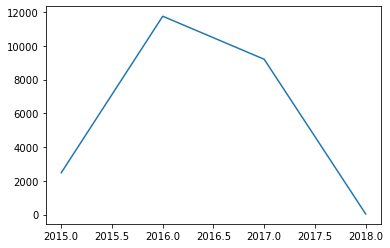

In [61]:
s.plot()

In [62]:
s = df_true_news['date'].dt.year.value_counts().sort_index()

<AxesSubplot:>

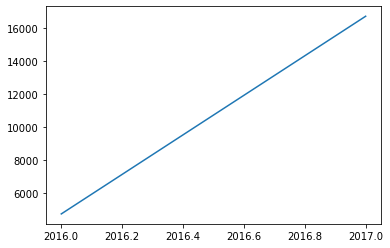

In [64]:
# Since only 2 years of data so it will not give a good visualization with years
s.plot()

In [69]:
# Plot trend on months
s = df_fake_news['date'].dt.month.value_counts().sort_index()

<AxesSubplot:>

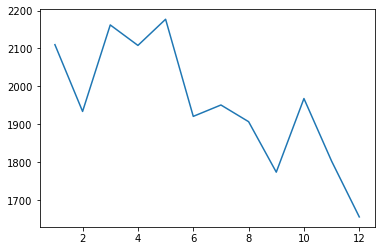

In [70]:
s.plot()

In [71]:
s = df_true_news['date'].dt.month.value_counts().sort_index()

<AxesSubplot:>

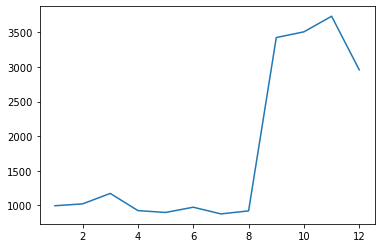

In [72]:
s.plot()